In [21]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd 
pd.set_option('max_rows', 99999)
pd.set_option('max_colwidth', 400)
pd.describe_option('max_colwidth')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
display.max_colwidth : int or None
    The maximum width in characters of a column in the repr of
    a pandas data structure. When the column overflows, a "..."
    placeholder is embedded in the output. A 'None' value means unlimited.
    [default: 50] [currently: 400]


In [22]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [ ]:
#data_nov2 = pd.read_csv('/content/drive/MyDrive/Weather/Nov2-weather.csv')

#data_nov2.tail()

In [23]:
data = pd.read_csv('/content/drive/MyDrive/Weather/Copy of merged-covid-weather-data_live_nov2.csv')
# selected_columns = data[['cases_total','average_temperature_celsius','relative_humidity','rainfall_mm','dew_point']]
# df_input = selected_columns.copy()


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (20,22,23,24,25) have mixed types.Specify dtype option on import or set low_memory=False.



In [4]:
data.head()

,Unnamed: 0,date,location_key,new_confirmed,new_deceased,new_recovered,new_tested,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested,average_temperature_celsius,minimum_temperature_celsius,maximum_temperature_celsius,rainfall_mm,snowfall_mm,dew_point,relative_humidity,country_code,country_name,subregion1_code,subregion1_name,subregion2_code,subregion2_name,locality_code,locality_name,iso_3166_1_alpha_2,iso_3166_1_alpha_3
0,0,2020-01-01,AD,0,0,160,1886,0,0,32170,402476,5.23,1.51,9.17,2.48,NaN,0.18,72.97,AD,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,AD,AND
1,1,2020-01-02,AD,0,0,160,1886,0,0,32170,402476,4.29,-0.78,10.44,5.02,NaN,-0.71,72.89,AD,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,AD,AND
2,2,2020-01-03,AD,0,0,160,1886,0,0,32170,402476,5.20,0.88,8.92,4.01,NaN,0.44,73.98,AD,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,AD,AND
3,3,2020-01-04,AD,0,0,160,1886,0,0,32170,402476,5.53,2.50,9.17,2.86,NaN,1.97,78.75,AD,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,AD,AND
4,4,2020-01-05,AD,0,0,160,1886,0,0,32170,402476,4.53,-0.60,10.29,1.98,NaN,-2.29,66.45,AD,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,AD,AND


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8627122 entries, 0 to 8627121
Data columns (total 28 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Unnamed: 0                   int64  
 1   date                         object 
 2   location_key                 object 
 3   new_confirmed                int64  
 4   new_deceased                 int64  
 5   new_recovered                int64  
 6   new_tested                   int64  
 7   cumulative_confirmed         int64  
 8   cumulative_deceased          int64  
 9   cumulative_recovered         int64  
 10  cumulative_tested            int64  
 11  average_temperature_celsius  float64
 12  minimum_temperature_celsius  float64
 13  maximum_temperature_celsius  float64
 14  rainfall_mm                  float64
 15  snowfall_mm                  float64
 16  dew_point                    float64
 17  relative_humidity            float64
 18  country_code                 object 
 19  

In [25]:
data.head()

,Unnamed: 0,date,location_key,new_confirmed,new_deceased,new_recovered,new_tested,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested,average_temperature_celsius,minimum_temperature_celsius,maximum_temperature_celsius,rainfall_mm,snowfall_mm,dew_point,relative_humidity,country_code,country_name,subregion1_code,subregion1_name,subregion2_code,subregion2_name,locality_code,locality_name,iso_3166_1_alpha_2,iso_3166_1_alpha_3
0,0,2020-01-01,AD,0,0,160,1886,0,0,32170,402476,5.23,1.51,9.17,2.48,NaN,0.18,72.97,AD,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,AD,AND
1,1,2020-01-02,AD,0,0,160,1886,0,0,32170,402476,4.29,-0.78,10.44,5.02,NaN,-0.71,72.89,AD,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,AD,AND
2,2,2020-01-03,AD,0,0,160,1886,0,0,32170,402476,5.20,0.88,8.92,4.01,NaN,0.44,73.98,AD,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,AD,AND
3,3,2020-01-04,AD,0,0,160,1886,0,0,32170,402476,5.53,2.50,9.17,2.86,NaN,1.97,78.75,AD,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,AD,AND
4,4,2020-01-05,AD,0,0,160,1886,0,0,32170,402476,4.53,-0.60,10.29,1.98,NaN,-2.29,66.45,AD,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,AD,AND


In [26]:
#Remove the all negative values from dataset
data['new_confirmed'] = data['new_confirmed'].clip(lower=0)
data['new_deceased'] = data['new_deceased'].clip(lower=0)
data['new_recovered'] = data['new_recovered'].clip(lower=0)
data['new_tested'] = data['new_tested'].clip(lower=0)
data['cumulative_confirmed'] = data['cumulative_confirmed'].clip(lower=0)

In [27]:
data['average_temperature_celsius'].interpolate(inplace=True)
data['minimum_temperature_celsius'].interpolate(inplace=True)
data['maximum_temperature_celsius'].interpolate(inplace=True)
data['rainfall_mm'].interpolate(inplace=True)
data['dew_point'].interpolate(inplace=True)
data['new_confirmed'].interpolate(inplace=True)
data['relative_humidity'].interpolate(inplace=True)


In [28]:
#Select the records which are not with nan values
data = data[data['location_key'].notna()]

In [134]:
#rename the columns 
data.rename(columns={'date': 'Date', 'new_confirmed': 'New_Cases','new_deceased': 'New_Death','cumulative_confirmed': 'Total_Confirmed','average_temperature_celsius': 'Avg_Temp',
                   'relative_humidity': 'Humidity','minimum_temperature_celsius': 'Min_Temp','maximum_temperature_celsius': 'Max_Temp','rainfall_mm': 'Rain_Fall',
                   'dew_point':'Dew_Point','country_name':'Country','iso_3166_1_alpha_3': 'iso_code'
                   
                   }, inplace=True)

In [136]:
global_data = data[['Date','New_Cases','Avg_Temp','iso_code',]]

global_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8626462 entries, 0 to 8627121
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date       object 
 1   New_Cases  int64  
 2   Avg_Temp   float64
 3   iso_code   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 329.1+ MB


In [137]:
import numpy as np
np.random.seed(1)

import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers.core import Dense
from keras.layers.recurrent import LSTM
from keras import optimizers
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import datetime as dt
import time
plt.style.use('ggplot')

# USA LSTM Model

# LSTM Timerseries Model 

In [138]:
global_data['Date'] = pd.to_datetime(global_data['Date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [142]:
train_start = pd.to_datetime("2021-8-1")
train_end = pd.to_datetime("2021-11-1")
mask_train = (global_data['Date'] > train_start) & (global_data['Date'] <= train_end)
global_model_data = global_data.loc[mask_train]

In [143]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
global_model_data['Country_label']= label_encoder.fit_transform(global_model_data['iso_code'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [145]:
global_model_data.drop('iso_code', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [146]:
global_model_data_new = global_model_data.copy() 
global_model_data_new[global_model_data_new.columns[0]] = pd.to_datetime(global_model_data_new[global_model_data_new.columns[0]], format='%d-%m-%Y')
global_model_data_new = global_model_data_new.set_index(global_model_data_new.columns[0])
global_model_data_new = global_model_data_new.sort_index()
global_model_data = global_model_data_new.astype('float')

In [147]:
global_model_data.tail()

,New_Cases,Avg_Temp,Country_label
Date,,,
2021-11-01,0.0,10.00,204.0
2021-11-01,0.0,12.11,204.0
2021-11-01,9.0,9.83,204.0
2021-11-01,1.0,11.22,204.0
2021-11-01,114.0,4.56,204.0


In [148]:
global_model_data[global_model_data['Country_label']== 205].tail(2)

,New_Cases,Avg_Temp,Country_label
Date,,,
2021-10-29,316.0,7.21,205.0
2021-10-30,281.0,9.86,205.0


In [149]:
validate = global_model_data[['Country_label','New_Cases','Avg_Temp']].tail(5)
global_model_data.drop(global_model_data.tail(5).index,inplace=True)

In [150]:
global_model_data.tail()

,New_Cases,Avg_Temp,Country_label
Date,,,
2021-10-31,0.0,20.54,27.0
2021-10-31,0.0,20.04,40.0
2021-10-31,0.0,24.65,27.0
2021-10-31,2.0,20.04,40.0
2021-10-31,0.0,17.26,204.0


In [151]:
X_scaler = MinMaxScaler()
Y_scaler = MinMaxScaler()
X_data = X_scaler.fit_transform(global_model_data[['Country_label','New_Cases','Avg_Temp']])
Y_data = Y_scaler.fit_transform(global_model_data[['New_Cases']]) 

In [ ]:
#X_data = X_data.reshape(X_data.shape[0], X_data.shape[1],1)

#X_data.shape

In [ ]:
#Y_data = Y_data.reshape(Y_data.shape[0], Y_data.shape[1],1)

#Y_data.shape



In [152]:
 def custom_ts_multi_data_prep(dataset, target, start, end, window, horizon):
    X = []
    y = []
    start = start + window
    if end is None:
        end = len(dataset) - horizon

    for i in range(start, end):
        indices = range(i-window, i)
        X.append(dataset[indices])

        indicey = range(i+1, i+1+horizon)
        y.append(target[indicey])
    return np.array(X), np.array(y)

In [153]:
hist_window = 1
horizon = 2
TRAIN_SPLIT = 30000
x_train, y_train = custom_ts_multi_data_prep(X_data, Y_data, 0, TRAIN_SPLIT, hist_window, horizon)
x_vali, y_vali = custom_ts_multi_data_prep(X_data, Y_data, TRAIN_SPLIT, None, hist_window, horizon)

In [154]:
x_train

array([[[2.29357798e-02, 9.50993789e-05, 6.71867612e-01]],

       [[9.35779817e-01, 0.00000000e+00, 8.17494090e-01]],

       [[3.21100917e-02, 6.00627656e-05, 6.36288416e-01]],

       ...,

       [[5.64220183e-01, 5.00523047e-06, 7.53782506e-01]],

       [[5.64220183e-01, 1.00104609e-05, 7.83569740e-01]],

       [[5.64220183e-01, 5.00523047e-06, 8.05673759e-01]]])

In [155]:
print ('Multiple window of past history\n')
print(x_train[0])
print ('\n Target horizon\n')
print (y_train[0])

Multiple window of past history

[[2.29357798e-02 9.50993789e-05 6.71867612e-01]]

 Target horizon

[[6.00627656e-05]
 [1.50156914e-05]]


In [156]:
 import tensorflow as tf 
batch_size = 256
buffer_size = 150

train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.cache().shuffle(buffer_size).batch(batch_size).repeat()

val_data = tf.data.Dataset.from_tensor_slices((x_vali, y_vali))
val_data = val_data.batch(batch_size).repeat()

In [157]:
lstm_model = tf.keras.models.Sequential([
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(200, return_sequences=True), 
                               input_shape=x_train.shape[-2:]),
    tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150)),
    tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=horizon),
])
lstm_model.compile(optimizer='adam', loss='mse')

In [158]:
lstm_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_6 (Bidirectio  (None, 1, 400)           326400    
 nal)                                                            
                                                                 
 dense_12 (Dense)            (None, 1, 20)             8020      
                                                                 
 bidirectional_7 (Bidirectio  (None, 300)              205200    
 nal)                                                            
                                                                 
 dense_13 (Dense)            (None, 20)                6020      
                                                                 
 dense_14 (Dense)            (None, 20)                420       
                                                                 
 dropout_3 (Dropout)         (None, 20)               

In [159]:
model_path = 'Bidirectional_LSTM_Multivariate.h5'
early_stopings = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min')
checkpoint =  tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, mode='min', verbose=0)
callbacks=[early_stopings,checkpoint]

In [160]:
history = lstm_model.fit(train_data,epochs=150,steps_per_epoch=64,validation_data=val_data,validation_steps=50,verbose=1,callbacks=callbacks)

Epoch 1/150
64/64 [==============================] - 9s 48ms/step - loss: 4.1829e-05 - val_loss: 3.7789e-05
Epoch 2/150
64/64 [==============================] - 1s 23ms/step - loss: 4.1593e-05 - val_loss: 4.0527e-05
Epoch 3/150
64/64 [==============================] - 1s 23ms/step - loss: 3.4970e-05 - val_loss: 3.8039e-05
Epoch 4/150
64/64 [==============================] - 2s 28ms/step - loss: 4.2145e-05 - val_loss: 3.6995e-05
Epoch 5/150
64/64 [==============================] - 1s 23ms/step - loss: 3.5031e-05 - val_loss: 3.7099e-05
Epoch 6/150
64/64 [==============================] - 2s 24ms/step - loss: 4.7585e-05 - val_loss: 3.7281e-05
Epoch 7/150
64/64 [==============================] - 1s 23ms/step - loss: 3.0275e-05 - val_loss: 3.7104e-05
Epoch 8/150
64/64 [==============================] - 1s 23ms/step - loss: 4.6846e-05 - val_loss: 3.7895e-05
Epoch 9/150
64/64 [==============================] - 1s 22ms/step - loss: 5.2871e-05 - val_loss: 3.8801e-05
Epoch 10/150
64/64 [========

In [161]:
data_val = X_scaler.fit_transform(global_model_data[['Country_label','New_Cases','Avg_Temp']].tail(1))
val_rescaled = data_val.reshape(1, data_val.shape[0], data_val.shape[1])

In [97]:
val_rescaled

array([[[0., 0., 0.]]])

In [162]:
pred = lstm_model.predict(val_rescaled)
pred

array([[-0.0004371 , -0.00120942]], dtype=float32)

In [100]:
x = pred[0][0]

In [105]:
print("%.10f" % x)

0.0001811867


In [163]:
pred_Inverse = Y_scaler.inverse_transform(pred)
pred_Inverse

array([[ -87.329185, -241.63026 ]], dtype=float32)

In [164]:
lstm_model.save('/content/drive/MyDrive/Weather/Deployment/finalmodel.h5')

In [53]:
 from sklearn import metrics
 def timeseries_evaluation_metrics_func(y_true, y_pred):
     def mean_absolute_percentage_error(y_true, y_pred): 
         y_true, y_pred = np.array(y_true), np.array(y_pred)
         return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
     print('Evaluation metric results:-')
     print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
     print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
     print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
     print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
     print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n') 

In [55]:
#timeseries_evaluation_metrics_func(validate['New_Cases'],pred_Inverse[0])

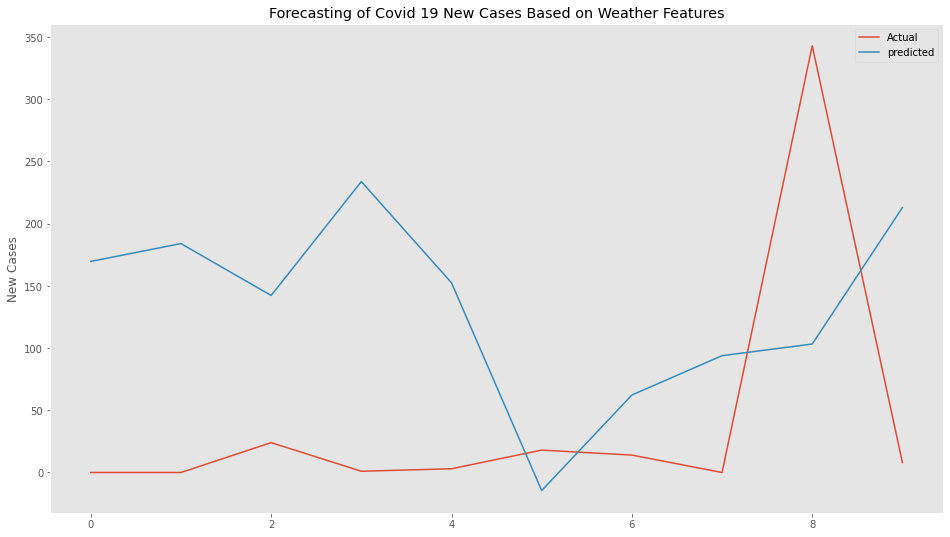

In [ ]:
plt.figure(figsize=(16,9))
plt.plot( list(validate['New_Cases']))
plt.plot( list(pred_Inverse[0]))
plt.title("Forecasting of Covid 19 New Cases Based on Weather Features")
plt.ylabel("New Cases")
plt.legend(('Actual','predicted'))
plt.show()

In [119]:
# Your number, defined to 10 decimal places
x =  0.0015074200928211212
# Convert to string using f-strings with 10 decimal precision
out = f'{x:.10f}'
# Split at the decimal and take the second element from that list
out = out.split('.')[1]
# Strip the zeros from the left side of your split decimal
out = out.lstrip('0')

In [120]:
out

'15074201'

In [167]:
#covid data
df_covid = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/latest/owid-covid-latest.csv')

df_covid.head(2)

,iso_code,continent,location,last_updated_date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2021-11-13,156510.0,23.0,16.143,7292.0,0.0,1.143,3928.915,0.577,0.405,183.053,0.000,0.029,0.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5852810.0,3097293.0,2755517.0,NaN,NaN,99520.0,14.69,7.78,6.92,NaN,2498.0,27.78,3.983543e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,OWID_AFR,NaN,Africa,2021-11-13,8557112.0,2516.0,3950.857,220788.0,394.0,205.429,6230.212,1.832,2.877,160.750,0.287,0.150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209788026.0,130945095.0,87750998.0,233093.0,325743.0,1002117.0,15.27,9.53,6.39,0.02,730.0,NaN,1.373486e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
CA_Cases = df_covid[df_covid['new_cases'] == 'USA']

CA_Cases